In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

## **Read in CSV Files**:

In [2]:
train_values_df = pd.read_csv('data/training_set_values.csv')
train_values_df.head(2) 

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [3]:
no_pop = train_values_df[train_values_df['population'] == 0]
pd.set_option('display.max_columns', None)
no_pop['construction_year'].value_counts(normalize=True)

0       0.937000
2000    0.010336
2009    0.005051
2002    0.004817
1990    0.003508
2008    0.003040
2003    0.002806
1974    0.002759
1985    0.002713
2010    0.002105
1984    0.001964
1978    0.001918
1986    0.001824
2006    0.001777
1997    0.001684
1995    0.001543
1989    0.001450
1994    0.001450
1996    0.001169
1976    0.001076
1993    0.001029
1988    0.000982
2005    0.000935
2007    0.000935
1983    0.000889
1987    0.000795
1991    0.000702
2011    0.000702
1982    0.000561
1977    0.000514
2012    0.000468
1992    0.000468
1975    0.000281
1980    0.000187
1973    0.000187
1998    0.000140
1971    0.000094
2013    0.000047
1970    0.000047
1999    0.000047
Name: construction_year, dtype: float64

In [4]:
test_values_df = pd.read_csv('data/test_set_values.csv')
test_values_df.head(2)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,Internal,Magoma,Manyara,21,3,Mbulu,Bashay,321,True,GeoData Consultants Ltd,Parastatal,NaN,True,2012,other,other,other,parastatal,parastatal,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
1,51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,Pangani,Kimnyak,Arusha,2,2,Arusha Rural,Kimnyaki,300,True,GeoData Consultants Ltd,VWC,TPRI pipe line,True,2000,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe


In [5]:
submission_format_df = pd.read_csv('data/submission_format.csv')
submission_format_df.head()

,id,status_group
0,50785,predicted label
1,51630,predicted label
2,17168,predicted label
3,45559,predicted label
4,49871,predicted label


In [6]:
train_labels_df = pd.read_csv('data/training_set_labels.csv')
train_labels_df.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


## **Merging Dataframes Above**

In [7]:
# merging train_values_df & train_labels_df
train_values_df = pd.merge(train_values_df, train_labels_df, on='id', how='left')
# merging test_values_df & submission_format_df
test_values_df = pd.merge(test_values_df, submission_format_df, on='id', how='left')

---

## **EDA**

In [8]:
print(f'train_values_df columns: \n{list(train_values_df.columns)}\n{train_values_df.shape}\n')
print(f'test_values_df columns: \n{list(test_values_df.columns)}\n{test_values_df.shape}\n')
print(f'submission_format_df columns: \n{list(submission_format_df.columns)}\n{submission_format_df.shape}\n')
print(f'train_labels_df columns: \n{list(train_labels_df.columns)}\n{train_labels_df.shape}\n')

train_values_df columns: 
['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height', 'installer', 'longitude', 'latitude', 'wpt_name', 'num_private', 'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga', 'ward', 'population', 'public_meeting', 'recorded_by', 'scheme_management', 'scheme_name', 'permit', 'construction_year', 'extraction_type', 'extraction_type_group', 'extraction_type_class', 'management', 'management_group', 'payment', 'payment_type', 'water_quality', 'quality_group', 'quantity', 'quantity_group', 'source', 'source_type', 'source_class', 'waterpoint_type', 'waterpoint_type_group', 'status_group']
(59400, 41)

test_values_df columns: 
['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height', 'installer', 'longitude', 'latitude', 'wpt_name', 'num_private', 'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga', 'ward', 'population', 'public_meeting', 'recorded_by', 'scheme_management', 'scheme_name', 'permit', 'construction_year',

---

## **Identify Missing Values**

#### (7) columns with missing values in **train_values_df**:

In [9]:
train_values_df.isna().sum().sort_values(ascending=False).head(7)

scheme_name          28166
scheme_management     3877
installer             3655
funder                3635
public_meeting        3334
permit                3056
subvillage             371
dtype: int64

#### (7) columns with missing values in **test_values_df**:

In [10]:
test_values_df.isna().sum().sort_values(ascending=False).head(7)

scheme_name          7092
scheme_management     969
installer             877
funder                869
public_meeting        821
permit                737
subvillage             99
dtype: int64

#### No values missing in **submission_format_df**:

In [11]:
submission_format_df.isna().sum().sort_values(ascending=False)

id              0
status_group    0
dtype: int64

#### No values missing in **train_labels_df**:

In [12]:
train_labels_df.isna().sum().sort_values(ascending=False)

id              0
status_group    0
dtype: int64

---

## **Data Limitations & Cleaning**

What we do to **train_values_df** we will do to **test_values_df**:
1. **Dropping Columns**:
- For example, **'scheme_name'** is missing 28,166 values out of 59,400 in train_values_df. As a result, we will drop this column and others we wont need.
2. **Dropping rows with missing values**:
- For rows with a few missing values, we will drop the rows so we can preserve the columns.
3. **Data Type Conversion**:
- The 'date_recorded' column was the only column that needed to be changes to datetime
4. **Renaming Columns**:
- Many of the columns have names that are confusing or dont represent the data. These have been changed.

In [13]:

# Dropping unneeded columns
dropped_columns = ['scheme_name', 'num_private', 'region_code', 'district_code',
                   'public_meeting', 'recorded_by', 'extraction_type',
                   'extraction_type_group', 'management', 'payment_type',
                   'water_quality', 'quantity_group', 'source_type', 'waterpoint_type' ,'payment_type' , 'funder' , 'subvillage', 'lga', 'construction_year', 'date_recorded'
                   ]
train_values_df = train_values_df.drop(columns=dropped_columns)
test_values_df = test_values_df.drop(columns=dropped_columns)


# Dropping rows with missing values
dropped_rows = ['scheme_management', 'installer', 'permit'
                ]
train_values_df.dropna(subset=dropped_rows, inplace=True)
test_values_df.dropna(subset=dropped_rows, inplace=True)

# Renaming Columns
renamed_col = {'amount_tsh': 'total_static_head(ft)', 'gps_height': 'height',
               'wpt_name': 'waterpoint_name', 'basin': 'basin_location',
                'permit': 'permit_approved',
               'extraction_type_class': 'extraction_method',
               'management_group': 'management_type',
                'quality_group': 'quality_of_water',
               'quantity': 'quantity_of_water', 'source': 'water_source'
               }
train_values_df = train_values_df.rename(columns=renamed_col)
test_values_df = test_values_df.rename(columns=renamed_col)


---

In [14]:
train_values_df['status_group'].value_counts()

functional                 28067
non functional             19628
functional needs repair     3624
Name: status_group, dtype: int64

In [15]:
# Adding Functional needs repairs values to Functional
train_values_df.loc[(train_values_df['status_group'] == 'functional needs repair'), 'status_group'] = "functional"
train_values_df['status_group'].value_counts()

functional        31691
non functional    19628
Name: status_group, dtype: int64

In [16]:
train_values_df['population'].value_counts().sort_values(ascending=False)[:20]

0      17905
1       5881
150     1770
200     1573
250     1481
300     1161
50      1071
100     1016
350      885
120      860
500      827
60       676
400      606
30       600
40       536
80       513
20       437
450      413
600      332
230      329
Name: population, dtype: int64

## **Sorting Dataframes**

In [17]:
train_values_df.columns[0:8]


Index(['id', 'total_static_head(ft)', 'height', 'installer', 'longitude',
       'latitude', 'waterpoint_name', 'basin_location'],
      dtype='object')

In [18]:
#if unknown makes up less than 1%, drop unknown rows from our table 
def drop_unknown(df, column):
    counts = df[column].value_counts(normalize=True)
    if 'unknown' in counts.index and counts['unknown'] < 0.01:
        df.drop(df[df[column] == 'unknown'].index, inplace=True)

#loop through columns to drop unknowns
for column in train_values_df.columns: 
    drop_unknown(train_values_df, column)

In [19]:
train_values_df['population'].value_counts()

0       17759
1        5709
150      1755
200      1558
250      1443
        ...  
1380        1
2698        1
3050        1
821         1
788         1
Name: population, Length: 1009, dtype: int64

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import log_loss

## Maddie's Model

In [21]:
from sklearn.tree import DecisionTreeClassifier

In [22]:
train_values_df.drop(['id', 'population', 'waterpoint_name', 'longitude', 'latitude', 'installer', 'scheme_management'], axis=1, inplace=True)


In [23]:

train_values_df['status_group'] = train_values_df['status_group'].map({'functional': 1, 'non functional': 0})


In [24]:
train_values_df['status_group'].value_counts()

1    31409
0    19224
Name: status_group, dtype: int64

In [25]:
#One Hot Encode categorical features 
from sklearn.preprocessing import OneHotEncoder
X = train_values_df.drop('status_group', axis=1)
y = train_values_df['status_group']

X_cats = X.select_dtypes(include='object')

ohe = OneHotEncoder(drop='first')
ohe.fit(X_cats)
X_cats_encoded = pd.DataFrame(ohe.transform(X_cats).todense(), columns=ohe.get_feature_names_out())


In [26]:
X_cats_encoded.shape

(50633, 1973)

In [27]:
#concat with numerical columns 
X_num = X.select_dtypes(exclude='object')
X_cats_encoded = X_cats_encoded.reset_index(drop=True)
X_num = X_num.reset_index(drop=True)

In [28]:
X_processed = pd.concat([X_num, X_cats_encoded], axis=1)

In [29]:
X_processed.shape

(50633, 1975)

In [31]:
#perform train-test split
X = X_processed
y = train_values_df['status_group']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [32]:
from sklearn.tree import DecisionTreeClassifier

In [33]:
#fit decision tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [34]:
#predict from X_test
y_preds = dt.predict(X_test)


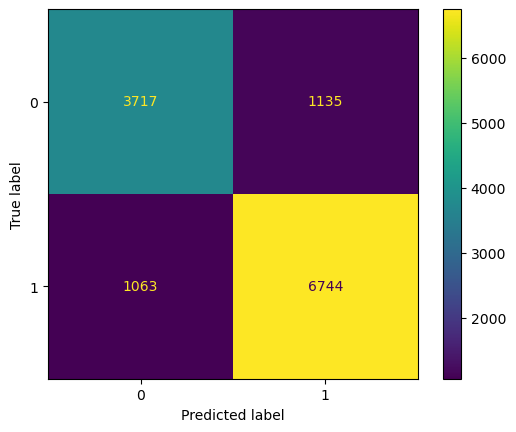

In [35]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

ConfusionMatrixDisplay.from_estimator(dt, X_test, y_test)

In [36]:
from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score

In [38]:
recall = recall_score(y_test, y_preds)
accuracy = accuracy_score(y_test, y_preds)
f1 = f1_score(y_test, y_preds)

print(f'recall: {recall}')
print(f'accuracy: {accuracy}')
print(f'f1: {f1}')

recall: 0.8638401434609966
accuracy: 0.8263685915159176
f1: 0.8598750478133368
